#American Sign Language Recognition Using CNN

###Communication plays a crucial role in our lives. However, individuals who are deaf or mute face significant challenges in interacting with others due to their inability to speak or hear. To bridge this gap, sign language, particularly hand gestures, serves as a primary mode of communication. Developing an application that can recognize these gestures is essential to enabling seamless communication between deaf individuals and those who are not familiar with sign language. The goal of this work is to take an initial step toward overcoming communication barriers between the hearing community and individuals with hearing and speech impairments, utilizing sign language recognition technology.

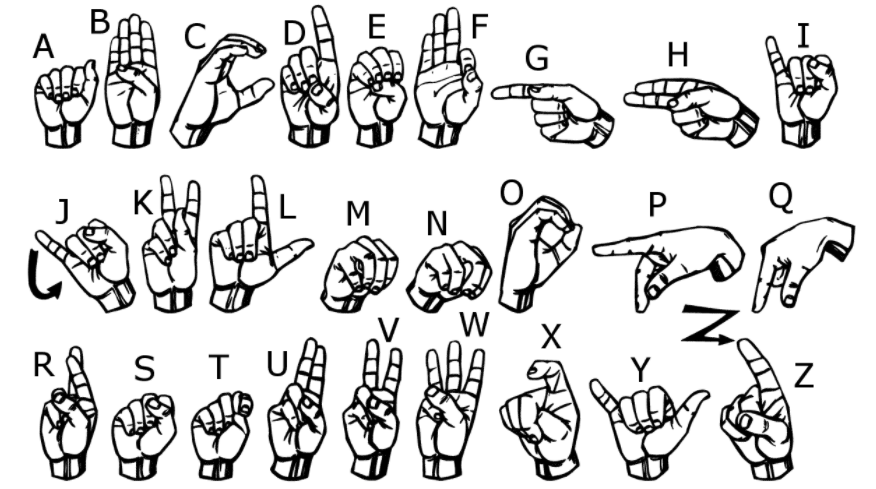

**The letters 'J' and 'Z' are excluded from this dataset because they rely on motion for representation. Additionally, the counting starts at 0, meaning letter 'A' corresponds to 0, 'B' to 1, and so forth.**

In [ ]:
import numpy as np # For numerical operations and array manipulation
import pandas as pd  # For data manipulation and analysis

import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns  # For enhanced data visualization

from sklearn.preprocessing import LabelBinarizer  # For converting labels to binary format
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For augmenting image datasets
from sklearn.metrics import classification_report, confusion_matrix  # For model evaluation metrics

import keras
from keras.models import Sequential  # For defining a linear stack of layers
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, Dropout  # For building and customizing the model layers

In [ ]:
train_set = pd.read_csv('sign_mnist_train.csv')
test_set = pd.read_csv('sign_mnist_test.csv')

train_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


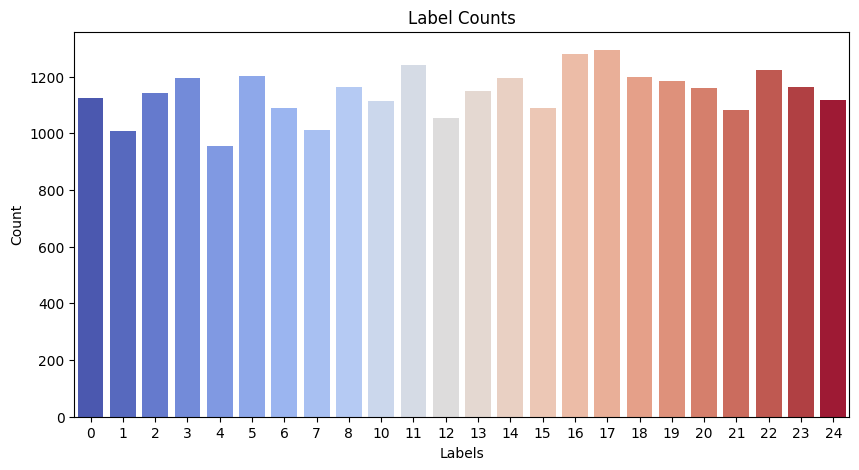

In [ ]:
label_counts = train_set['label'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='coolwarm', hue=label_counts.index, dodge=False, legend=False)
plt.title('Label Counts')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

**The labels in the dataset are approximately evenly distributed, with counts across all categories being similar. This indicates that the dataset is not significantly skewed, and the classes are well-balanced.**

In [ ]:
train_missing = train_set.isnull().sum().sum()
print(f"Missing values in train_set: {train_missing}")

test_missing = test_set.isnull().sum().sum()
print(f"Missing values in test_set: {test_missing}")

if train_missing > 0 or test_missing > 0:
    print("Action is needed to handle missing values.")
else:
    print("No missing values in either dataset.")

Missing values in train_set: 0
Missing values in test_set: 0
No missing values in either dataset.


**There are no missing values in the training and testing sets**

In [ ]:
train_data = train_set.drop('label', axis=1)
train_labels = train_set['label']

test_data = test_set.drop('label', axis=1)
test_labels = test_set['label']

**This step separates the dataset into features (pixel values) and labels (target classes).**

**The label column is removed to create train_data and test_data for model input, while train_labels and test_labels store the correct outputs for training and evaluation.**

In [ ]:
#Reshaping train and test data

train_data = train_data.values.reshape(train_data.shape[0], 28, 28, 1)

test_data = test_data.values.reshape(test_data.shape[0], 28, 28, 1)

**This step reshapes the feature data into 28x28x1 arrays, matching the structure of grayscale images. This format is required for feeding the data into a convolutional neural network later on in the project**

In [ ]:
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

**This step uses LabelBinarizer to convert the labels into a one-hot encoded format, where each class is represented as a binary vector. This format is necessary for training classification models, especially with categorical outputs.**

In [ ]:
train_data, dev_data, train_labels, dev_labels = train_test_split(train_data, train_labels, test_size=0.3, random_state=42)

print(f"Shape of train_data: {train_data.shape}")
print(f"Shape of dev_data: {dev_data.shape}")
print(f"Shape of test_data: {test_data.shape}")
print(f"Shape of train_labels: {train_labels.shape}")
print(f"Shape of dev_labels: {dev_labels.shape}")
print(f"Shape of test_labels: {test_labels.shape}")

Shape of train_data: (19218, 28, 28, 1)
Shape of dev_data: (8237, 28, 28, 1)
Shape of test_data: (7172, 28, 28, 1)
Shape of train_labels: (19218, 24)
Shape of dev_labels: (8237, 24)
Shape of test_labels: (7172, 24)


**This step splits the training data into a smaller training set and a validation set (30% of the training data) to evaluate the model during training. The random_state ensures reproducibility, and the dataset shapes are printed to confirm the split.**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    height_shift_range=0.15,
    width_shift_range=0.15,
    zoom_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

dev_data= dev_data/255
test_data= test_data/255

**These steps prepare the dataset for effective model training. The pixel values are normalized to 0-1 for faster and more stable training. Data augmentation is applied to the training data, introducing variations such as shifts, zooms, shearing, and flips. This helps the model generalize better and reduces the risk of overfitting. The validation and test datasets are also normalized to ensure consistency during performance evaluation.**

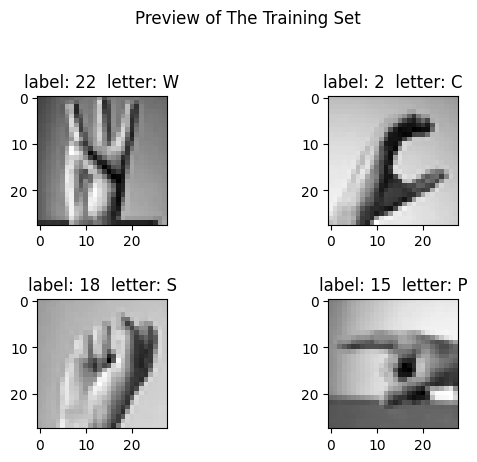

In [ ]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of The Training Set')

axe[0,0].imshow(train_data[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 22  letter: W')

axe[0,1].imshow(train_data[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 2  letter: C')

axe[1,0].imshow(train_data[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 18  letter: S')

axe[1,1].imshow(train_data[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 15  letter: P')

fig.tight_layout(pad=2.0)

**This visualization shows a preview of the sign language dataset:**

**Top Left: Label 22, letter W**.  

**Top Right: Label 2, letter C**.  

**Bottom Left: Label 18, letter S**.  

**Bottom Right: Label 15, letter P**.  

**Each is a 28x28 grayscale representation of a hand gesture, highlighting the diversity of signs used for classification.**

#Model Architecture
The model is designed for multi-class classification, specifically for recognizing 24 distinct classes in a sign language dataset. It consists of a series of convolutional layers for feature extraction, followed by fully connected dense layers to enable classification. The architecture is outlined as follows:

##Convolutional Layer 1:

Units: 128

Kernel Size: 5x5

Stride: 1

Activation Function: ReLU

Padding: Same (to preserve spatial dimensions)

##MaxPooling Layer 1:

Pool Size: 2x2

Stride: 2

Purpose: Downsample the feature maps to reduce computational complexity while retaining essential information.

##Convolutional Layer 2:

Units: 64

Kernel Size: 3x3

Stride: 2

Activation Function: ReLU

Padding: Same

##MaxPooling Layer 2:

Pool Size: 2x2

Stride: 2

Purpose: Further reduce the spatial dimensions of the feature maps while capturing important patterns.

##Convolutional Layer 3:

Units: 64

Kernel Size: 3x3

Stride: 1

Activation Function: ReLU

Padding: Same

##MaxPooling Layer 3:

Pool Size: 2x2

Stride: 2

Purpose: Continue downsampling and refining the learned features.

##Dense Layer 1:

Units: 128

Activation Function: ReLU

Purpose: Fully connected layer to aggregate learned features and prepare them for classification.

##Dense Layer 2:

Units: 64

Activation Function: ReLU

Purpose: Further refine and condense information before the final classification step.

##Output Layer:

Units: 24 (corresponding to 24 sign language classes)

Activation Function: Softmax

Purpose: Multi-class classification, producing a probability distribution across all 24 classes, with the highest value indicating the predicted class.

In [ ]:
model = Sequential()

model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters= 128, kernel_size=(5,5), strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 64, kernel_size=(3,3), strides=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 64, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=24,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 128)         │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │           1,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,184 (516.34 KB)

 Trainable params: 132,184 (516.34 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_datagen.flow(train_data, train_labels, batch_size=32, seed=42), epochs=20, validation_data=(dev_data,dev_labels))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


601/601 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.0554 - loss: 3.1410 - val_accuracy: 0.2344 - val_loss: 2.3999
Epoch 2/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 55s 91ms/step - accuracy: 0.2649 - loss: 2.2684 - val_accuracy: 0.5787 - val_loss: 1.1955
Epoch 3/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 77s 83ms/step - accuracy: 0.5128 - loss: 1.3878 - val_accuracy: 0.6686 - val_loss: 0.9092
Epoch 4/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 53s 88ms/step - accuracy: 0.6408 - loss: 1.0434 - val_accuracy: 0.7733 - val_loss: 0.6200
Epoch 5/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.6993 - loss: 0.8576 - val_accuracy: 0.8257 - val_loss: 0.4855
Epoch 6/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 50s 83ms/step - accuracy: 0.7416 - loss: 0.7389 - val_accuracy: 0.8737 - val_loss: 0.3855
Epoch 7/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 51s 84ms/step - accuracy: 0.7737 - loss: 0.6460 - val_accuracy: 0.8805 - val_loss: 0.3410
Epoch 8/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 85s 90ms/step - accuracy: 0.7892 - loss: 0.5892 - val_accurac

**The results show the model's training and validation performance improving over 20 epochs.**

**Training accuracy increased from 5.54% to 91.37%, while loss decreased from 3.1410 to 0.2529. Validation accuracy improved from 23.44% to 97.55%, and loss dropped from 2.3999 to 0.0763.**

**These trends indicate the model is learning effectively, generalizing well to unseen data, and not overfitting. It demonstrates readiness for fine-tuning.**

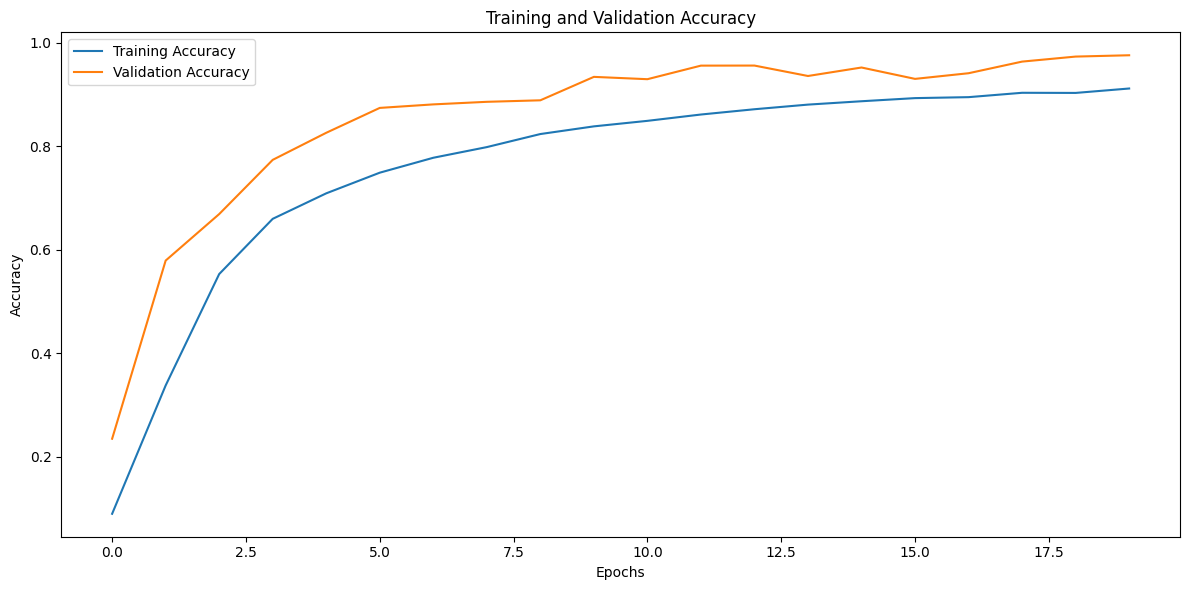

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

**The graph shows the training and validation accuracy of a model over 20 epochs.**

**Training Accuracy (blue line): Increases steadily with epochs, indicating the model is learning from the training data.**

**Validation Accuracy (orange line): Initially increases rapidly, then plateaus, suggesting the model generalizes well but may be nearing its performance limit.**

**The lack of divergence between the two lines indicates minimal overfitting.**

In [ ]:
dev_preds = model.predict(dev_data)

dev_preds_classes = np.argmax(dev_preds, axis=1)
dev_true_classes = np.argmax(dev_labels, axis=1)

print(classification_report(dev_true_classes, dev_preds_classes))

258/258 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       327
           1       1.00      1.00      1.00       275
           2       1.00      0.98      0.99       335
           3       1.00      0.93      0.96       375
           4       0.99      0.92      0.96       293
           5       1.00      0.99      1.00       373
           6       0.98      0.93      0.95       323
           7       0.92      0.97      0.95       299
           8       0.97      0.99      0.98       356
           9       0.99      0.99      0.99       331
          10       0.96      1.00      0.98       387
          11       0.92      0.94      0.93       342
          12       0.95      0.97      0.96       339
          13       0.95      1.00      0.98       354
          14       1.00      0.99      1.00       315
          15       1.00      0.99      1.00       406
          16       0.98      0.98      

**Accuracy: The model achieved an overall accuracy of 98%, meaning it correctly classified 98% of the images.**

**Precision: Most classes have high precision (close to 1), meaning the model made very few false positives for each class.**

**Recall: The recall is also high, indicating that the model successfully identified most of the actual positive samples for each class.**

**F1-Score: The F1-scores are high, representing a good balance between precision and recall for each class.**

**Support: This shows the number of samples in each class, which varies slightly per class but is generally high.**

**In summary, the model performs well across all classes with minimal errors, showing strong generalization and effective classification.**

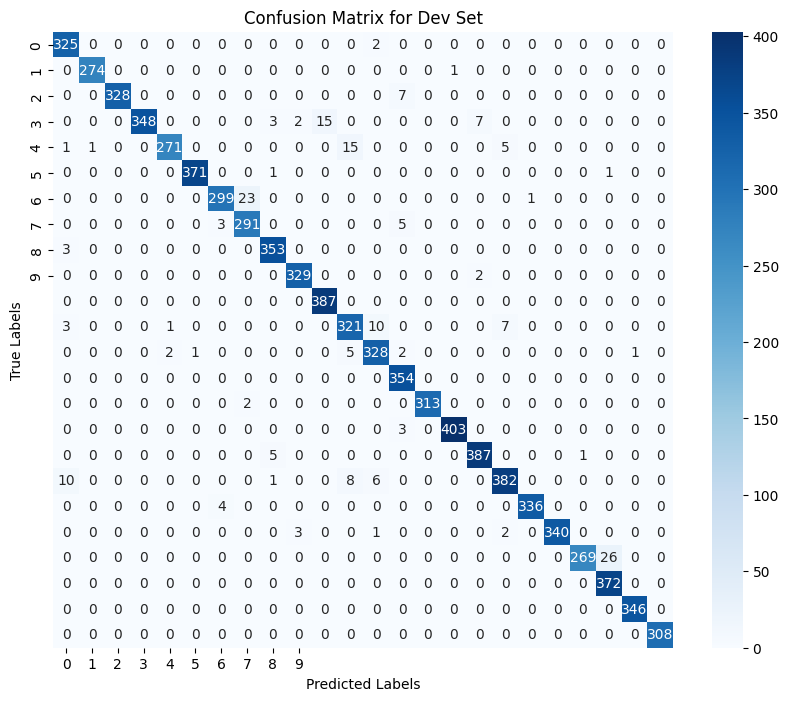

In [ ]:
cm_dev = confusion_matrix(dev_true_classes, dev_preds_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_dev, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Dev Set')
plt.show()

**Correct Predictions (Diagonal Entries):**

**- Most true labels align with predicted labels:**

**- Class 0 has 325 correctly classified samples.**

**- Class 5 has 371 correctly classified samples.**


**Misclassifications (Off-diagonal Entries):**

**- Class 3 has 15 samples misclassified as 10.**

**- Class 6 has 23 samples misclassified as 7.**

**Diagonal dominance suggests the model performs well overall, with minimal confusion between classes which indicates a strong performance**

In [ ]:
test_preds = model.predict(test_data)

test_preds_classes = np.argmax(test_preds, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

print(classification_report(test_true_classes, test_preds_classes))

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       331
           1       1.00      0.93      0.96       432
           2       1.00      0.93      0.96       310
           3       1.00      0.76      0.87       245
           4       0.97      0.88      0.92       498
           5       0.99      0.99      0.99       247
           6       0.93      0.99      0.96       348
           7       0.99      0.93      0.96       436
           8       0.99      0.99      0.99       288
           9       0.94      1.00      0.97       331
          10       0.85      1.00      0.92       209
          11       0.89      0.86      0.87       394
          12       0.77      0.98      0.86       291
          13       0.87      1.00      0.93       246
          14       1.00      1.00      1.00       347
          15       1.00      0.99      0.99       164
          16       0.87      1.00      

**Test Set Report Summary:**

**Accuracy: 0.94 meaning 94% of predictions are correct**

**Precision: Generally high, but class 21 has a low precision (0.68)**

**Recall: Many classes have perfect recall (1.00), but class 20 has lower recall (0.79).**

**F1-score: High for most classes, but lower for some like class 20 (0.88).**

**Comparison with Dev Set:**

**Test Accuracy: 0.94 vs. Dev Accuracy: 0.98 (slightly lower on the test set)**

**F1-scores: Slightly lower on the test set.**

**As a conclusion the model performs very well on the test set with 94% accuracy, showing strong generalization. The slight decrease in performance compared to the dev set suggests room for further improvement, but overall, the results are promising and indicate a solid model.**

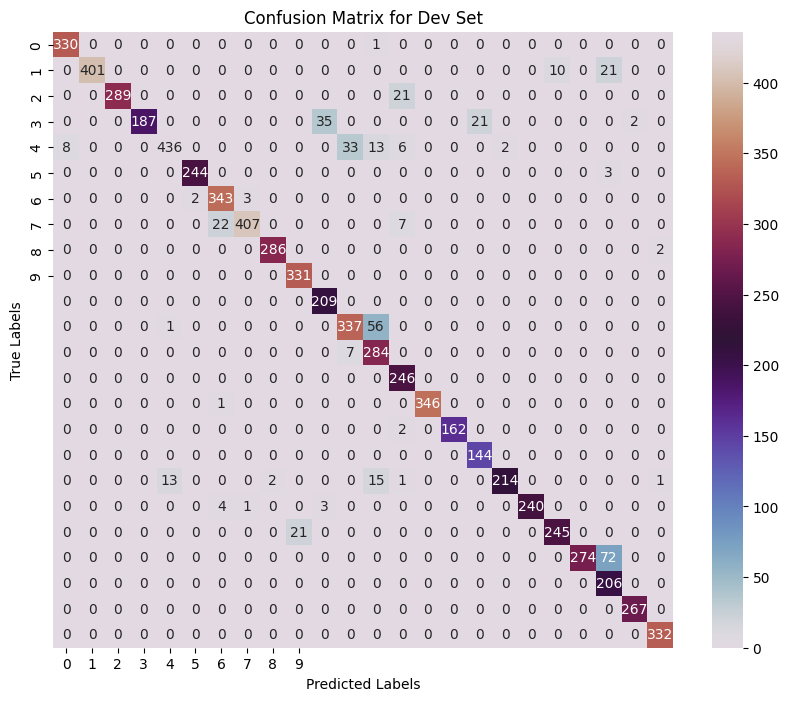

In [ ]:
cm_test = confusion_matrix(test_true_classes, test_preds_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="twilight", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Dev Set')
plt.show()

**Correct Predictions (Diagonal Entries):**

**- Strong performance is observed again, as most values are on the diagonal.**

**- Class 0 has 330 correct predictions (previously 325).**

**- Class 5 has 244 correct predictions (previously 371), indicating a drop in performance for this class.**


**Misclassifications (Off-diagonal Entries):**

**Some misclassifications are notable:**

**- Class 3 has 35 samples misclassified as 10 (previously fewer misclassifications).**

**- Class 6 has 3 samples misclassified as 7 (better than earlier, dropped from 23 to 3).**


**Comparison of Overall Performance:**

**- Diagonal dominance is still present.**

**- The misclassification patterns differ slightly but remain minimal for most classes, indicating consistent model performance across datasets.**

